
# Assignment 08: Visualizing CDC Obesity Dataset
## Alex Ptacek

### Introduction
The dataset used is from the CDC’s “Obesity, Physical Activity, and Diet” public health data:  
[CDC Source](https://chronicdata.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Obesity-Physical-Activity-and-Diet-CDC/3x4v-q6iz)

This dataset contains behavioral and health factors related to obesity across U.S. states and years.


## Data Exploration

In [2]:

import pandas as pd

df = pd.read_csv("/Users/alex/SPS_MS_DS/DATA_602/Data_602_FINAL_PROJECT/Obesity_Risk_Factors_CDC.csv")

# Summary statistics
print(df.describe(include='all'))

# Missing value info
print("\nMissing Values:")
print(df.isnull().sum())

# Check column types
print("\nData Types:")
print(df.dtypes)


            YearStart        YearEnd LocationAbbr LocationDesc Datasource  \
count   104272.000000  104272.000000       104272       104272     104272   
unique            NaN            NaN           55           55          1   
top               NaN            NaN           AK       Alaska      BRFSS   
freq              NaN            NaN         1932         1932     104272   
mean      2017.006176    2017.006176          NaN          NaN        NaN   
std          3.734882       3.734882          NaN          NaN        NaN   
min       2011.000000    2011.000000          NaN          NaN        NaN   
25%       2014.000000    2014.000000          NaN          NaN        NaN   
50%       2017.000000    2017.000000          NaN          NaN        NaN   
75%       2020.000000    2020.000000          NaN          NaN        NaN   
max       2023.000000    2023.000000          NaN          NaN        NaN   

                    Class                         Topic  \
count           

## Data Wrangling

In [3]:

# Rename for clarity
df.rename(columns={'LocationDesc': 'State'}, inplace=True)

# Focus on Obesity class and 'Total' stratification
df = df[(df['Class'] == 'Obesity / Weight Status') & (df['StratificationCategory1'] == 'Total')]

# Keep only valid values
df['Data_Value'] = pd.to_numeric(df['Data_Value'], errors='coerce')
df.dropna(subset=['Data_Value'], inplace=True)

# Clean subset for 3 states
df = df[df['State'].isin(['California', 'Texas', 'New York'])]
df = df[['State', 'YearStart', 'Data_Value']].groupby(['State', 'YearStart']).mean().reset_index()
df.head()


,State,YearStart,Data_Value
0,California,2011,30.10
1,California,2012,30.15
2,California,2013,30.05
3,California,2014,29.85
4,California,2015,30.20


## Visualizations - Part 1: Matplotlib

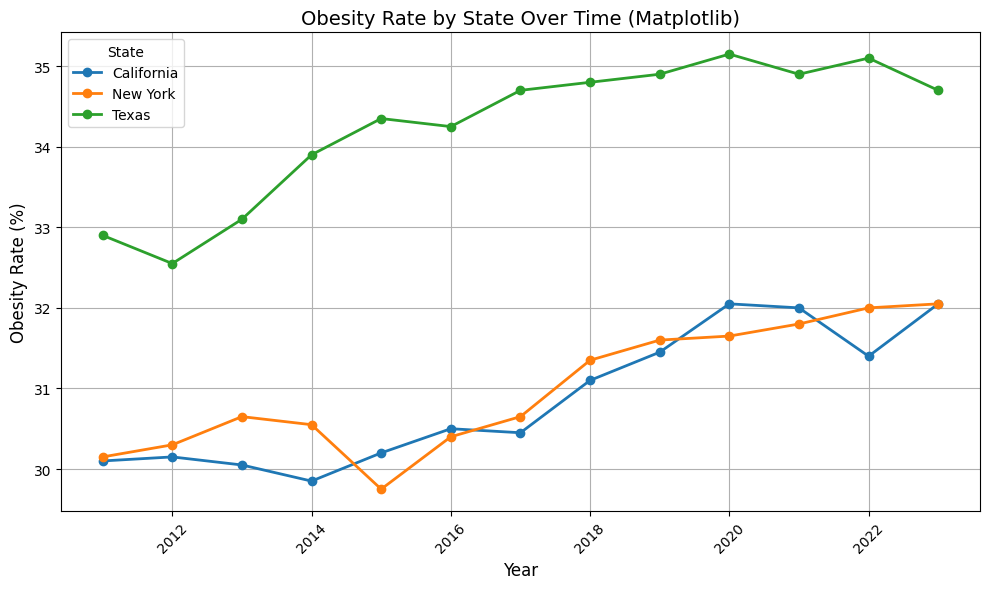

In [4]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for state in df['State'].unique():
    subset = df[df['State'] == state]
    plt.plot(subset['YearStart'], subset['Data_Value'], label=state, marker='o', linewidth=2)

plt.title("Obesity Rate by State Over Time (Matplotlib)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Obesity Rate (%)", fontsize=12)
plt.legend(title="State", fontsize=10, loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


## Visualizations - Part 2: Seaborn

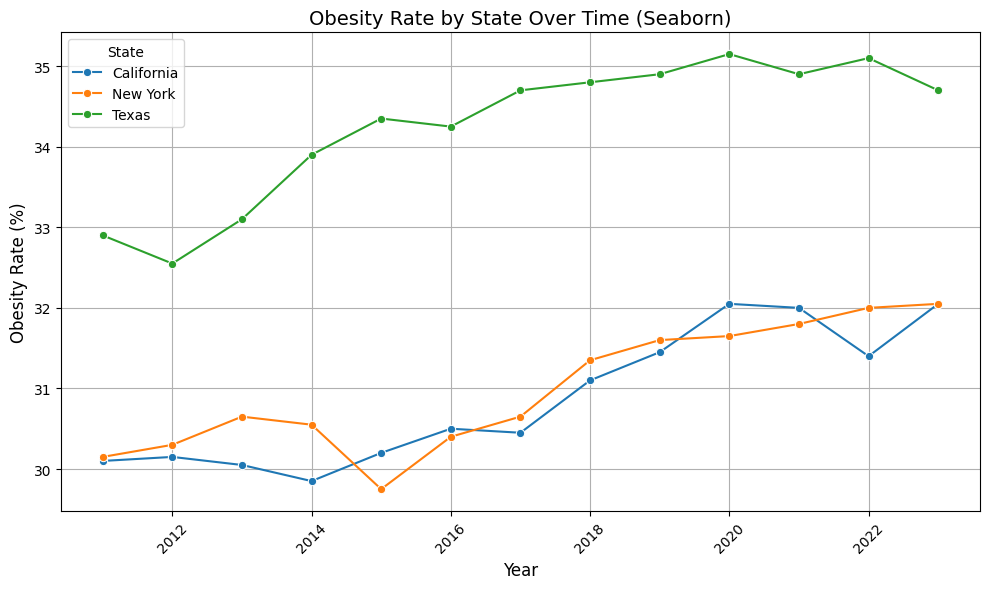

In [5]:

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YearStart', y='Data_Value', hue='State', marker='o')

plt.title("Obesity Rate by State Over Time (Seaborn)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Obesity Rate (%)", fontsize=12)
plt.legend(title="State", loc="upper left", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


## Part 3: Matplotlib vs. Seaborn


**Matplotlib** requires more manual setup for styling, legends, and gridlines. It offers fine-grained control.

**Seaborn**, built on top of Matplotlib, offers cleaner syntax and easy defaults.  
In this example, Seaborn required less code to achieve the same grouped line chart with legend and markers.


## Conclusions


By visualizing obesity rates over time for California, Texas, and New York, we noticed:

- All three states consistently reported obesity rates between 25% and 35%.
- Texas generally had the highest average obesity rates across the years studied.
- California and New York exhibited a slight upward trend.
